# Very deep

In [9]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
from verydeep import *
from lasso_elastic import clean_semicolumns, prepare_data, prepare_lagged_data

In [4]:
data = clean_semicolumns(pd.read_csv("Data/lasso_lagged.csv"))
data = prepare_lagged_data(data)

100%|██████████| 702/702 [00:04<00:00, 165.30it/s]


In [13]:
def plot_training(train_loss, test_loss, metrics_names, train_metrics_logs, test_metrics_logs):
    _, ax = plt.subplots(1, len(metrics_names) + 1, figsize=((len(metrics_names) + 1) * 5, 5))

    ax[0].plot(train_loss, c='blue', label='train')
    ax[0].plot(test_loss, c='orange', label='test')
    ax[0].set_title('Loss')
    ax[0].set_xlabel('epoch')
    ax[0].legend()

    for i in range(len(metrics_names)):
        ax[i + 1].plot(train_metrics_logs[i], c='blue', label='train')
        ax[i + 1].plot(test_metrics_logs[i], c='orange', label='test')
        ax[i + 1].set_title(metrics_names[i])
        ax[i + 1].set_xlabel('epoch')
        ax[i + 1].legend()

    plt.show()

#actually you have to use validation for each step of training, but now we will focus only on the toy example and will track the perfromance on test
def update_metrics_log(metrics_names, metrics_log, new_metrics_dict):
    for i in range(len(metrics_names)):
        curr_metric_name = metrics_names[i]
        metrics_log[i].append(new_metrics_dict[curr_metric_name])
    return metrics_log


def train_cycle(model, optimizer, criterion, metrics, train_loader, test_loader, n_epochs, device):
    train_loss_log,  test_loss_log = [], []
    metrics_names = list(metrics.keys())
    train_metrics_log = [[] for i in range(len(metrics))]
    test_metrics_log = [[] for i in range(len(metrics))]


    for epoch in range(n_epochs):
        print("Epoch {0} of {1}".format(epoch, n_epochs))
        train_loss, train_metrics = epoch_TRAIN(model, optimizer, criterion, metrics, train_loader, device)

        test_loss, test_metrics = epoch_EVAL(model, criterion, metrics, test_loader, device)

        train_loss_log.append(train_loss)
        train_metrics_log = update_metrics_log(metrics_names, train_metrics_log, train_metrics)

        test_loss_log.append(test_loss)
        test_metrics_log = update_metrics_log(metrics_names, test_metrics_log, test_metrics)

        plot_training(train_loss_log, test_loss_log, metrics_names, train_metrics_log, test_metrics_log)
    return train_metrics_log, test_metrics_log


metrics_name = list(metrics.keys())

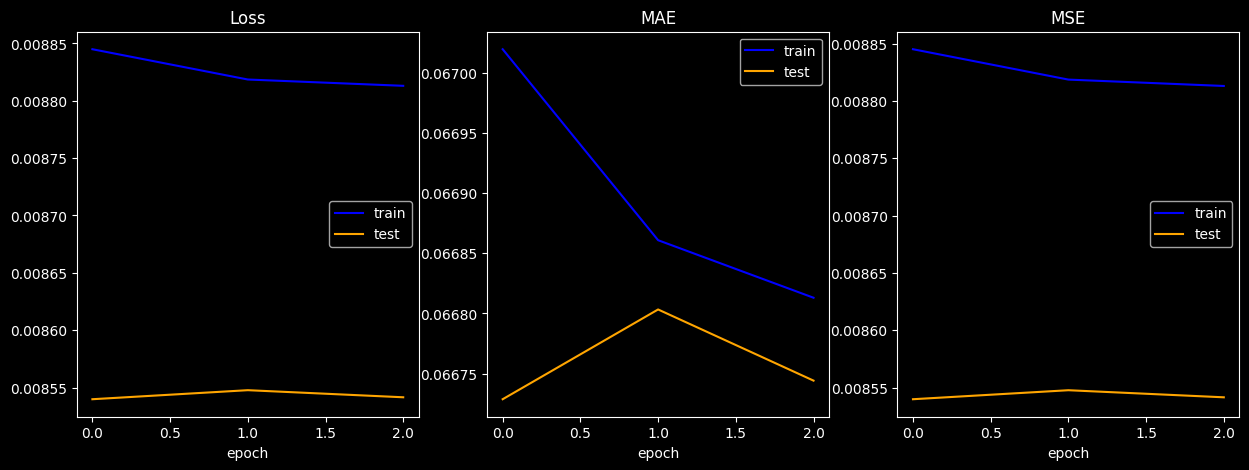

In [14]:
X_train_tensor, X_test_tensor, y_train_tensor, y_test_tensor, _ = get_tensors_data(data)

# Create the dataloaders
train_loader, test_loader = get_dataloaders(X_train_tensor, X_test_tensor, y_train_tensor, y_test_tensor)

# Create instance of the class for the model
model = VeryDeep(X_train_tensor.shape[1])

# Specify the model evaluation metrics
metrics = {'MAE': mean_absolute_error, "MSE": mean_squared_error}

# Specify the optimizer and the loss function
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.MSELoss()

train_metrics_log, test_metrics_log = train_cycle(model, 
                                                  optimizer,
                                                  criterion, 
                                                  metrics, 
                                                  train_loader, 
                                                  test_loader, 
                                                  n_epochs=3, 
                                                  device=get_device())

In [231]:
# Initialize model, loss function, and optimizer
model = VeryDeep()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
loss_train = []
loss_test = []
metric_train = []
metric_test = []

# Training loop
num_epochs = 50
for epoch in range(num_epochs):

    EPOCH_LOSS,  METRICS = epoch_TRAIN(model, optimizer, criterion, metrics, train_loader, device)
    EPOCH_LOSS_train, METRICS_train = epoch_EVAL(model, criterion, metrics, test_loader, device)
    metric_train.append(METRICS)
    metric_test.append(METRICS_train)
    loss_train.append(EPOCH_LOSS)
    loss_test.append(EPOCH_LOSS_train)

END OF EVALUATION EPOCH
LOSS: 0.0021 -- MAE: 0.0167


In [228]:
print(metric_test)
print(metric_train)

[0.016736090183258057, 0.016727302223443985, 0.0167615357786417, 0.016702858731150627, 0.01676655374467373, 0.016826000064611435, 0.016713373363018036, 0.01684042066335678, 0.016688376665115356, 0.016725288704037666]
[0.06695452332496643, 0.06684529781341553, 0.06682079285383224, 0.06678817421197891, 0.06676946580410004, 0.0667603388428688, 0.06675589829683304, 0.06674980372190475, 0.0667511448264122, 0.06675979495048523]


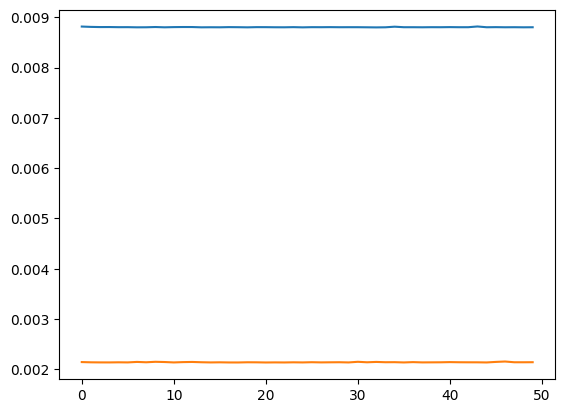

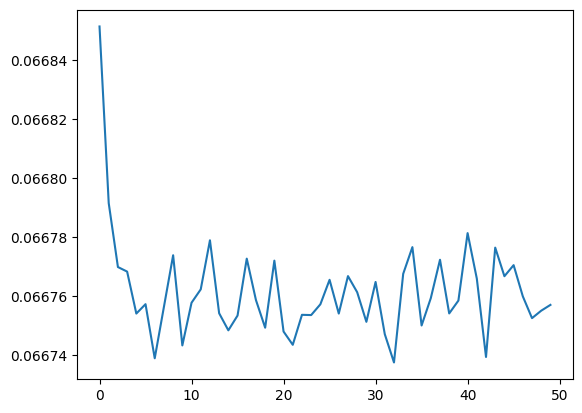

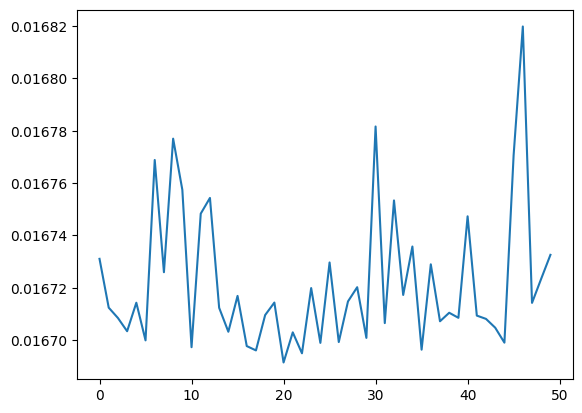

In [234]:
# metric_test = [i['MAE'].item() for i in metric_test]
# metric_train = [i['MAE'].item() for i in metric_train]
plt.plot(list(map(lambda x: x, loss_train)))

plt.plot(list(map(lambda x: x, loss_test)))
plt.show()
plt.plot(list(map(lambda x: x, metric_train)))
plt.show()
plt.plot(list(map(lambda x: x, metric_test)))
plt.show()

In [ ]:
model = VeryDeep()
criterion = nn.MSELoss()
optimizer = optim.Adam(VeryDeep.parameters(), lr=0.001)

# Training loop with mini-batches
epochs = 1000
for epoch in range(epochs):
    model.train()
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()

    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# Evaluate the model
model.eval()
with torch.no_grad():
    test_outputs = model(X_test_tensor)
    test_loss = criterion(test_outputs, y_test_tensor)
    print(f'Test Loss: {test_loss.item():.4f}')
